In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df=pd.read_csv('US_Accidents_June20.csv')
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.363784e+01,-1.174418e+02,3.399477e+01,-1.183440e+02,0.000000e+00,8.640000e+02,5.000000e+01,3.570000e+01,4.800000e+01,2.973000e+01,1.000000e+01,5.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.032217e+01,-8.093299e+01,4.105139e+01,-8.210168e+01,1.000000e-02,7.098000e+03,7.590000e+01,7.200000e+01,8.400000e+01,3.009000e+01,1.000000e+01,1.150000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,5.774000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [5]:
col=list(df.columns)

In [6]:
# import seaborn as sns
# sns.pairplot(df)

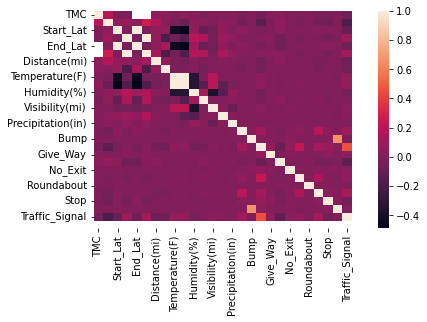

In [7]:
import seaborn as sns
sns.heatmap(df.corr());

In [8]:
df['Weather_Condition']

0             Light Rain
1             Light Rain
2               Overcast
3          Mostly Cloudy
4          Mostly Cloudy
               ...      
3513612             Fair
3513613             Fair
3513614    Partly Cloudy
3513615             Fair
3513616             Fair
Name: Weather_Condition, Length: 3513617, dtype: object

<AxesSubplot:xlabel='State'>

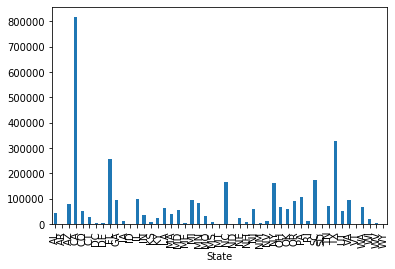

In [9]:
df.groupby(['State'])['ID'].count().plot(kind="bar")

In [10]:
new_df = df.copy()

In [11]:
new_df.shape

(3513617, 49)

In [12]:
new_df.drop('Astronomical_Twilight', axis=1, inplace=True)

In [13]:
new_df.shape

(3513617, 48)

In [14]:
col

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [15]:
new_df.drop(['Nautical_Twilight','Amenity',
            'Wind_Direction', 'Pressure(in)', 'Humidity(%)', 'Wind_Chill(F)','Country'],axis=1,inplace=True)

In [16]:
new_df.shape

(3513617, 41)

In [17]:
newcol=list(new_df.columns)
newcol

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight']

In [18]:
new_df.drop(['Source',],axis=1,inplace=True)

In [19]:
new_df.shape

(3513617, 40)

In [20]:
newcol=list(new_df.columns)
newcol

['ID',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight']

In [21]:
new_df.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,False,False,True,False,Night,Night
3,A-4,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,False,False,Night,Day
4,A-5,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,False,False,True,False,Day,Day


In [22]:
#chech what percentage we miss from the data
(new_df.isnull().sum()/len(new_df)*100).sort_values(ascending=False)

End_Lat              70.548896
End_Lng              70.548896
Number               64.402694
Precipitation(in)    57.657793
TMC                  29.451104
Wind_Speed(mph)      12.938490
Weather_Condition     2.166941
Visibility(mi)        2.158915
Temperature(F)        1.870779
Weather_Timestamp     1.233003
Airport_Code          0.192337
Timezone              0.110428
Zipcode               0.030424
Sunrise_Sunset        0.003273
Civil_Twilight        0.003273
City                  0.003188
Description           0.000028
County                0.000000
Junction              0.000000
Severity              0.000000
Turning_Loop          0.000000
Traffic_Signal        0.000000
Traffic_Calming       0.000000
Stop                  0.000000
Station               0.000000
Roundabout            0.000000
Railway               0.000000
No_Exit               0.000000
Crossing              0.000000
Give_Way              0.000000
State                 0.000000
Bump                  0.000000
Start_Ti

In [23]:
new_df.drop(['End_Lat','End_Lng','Number'],axis=1,inplace=True)

In [24]:
new_df.shape

(3513617, 37)

In [25]:
new_df.drop(['Precipitation(in)'],axis=1,inplace=True)

In [26]:
(new_df.isnull().sum()/len(new_df)*100).sort_values(ascending=False)

TMC                  29.451104
Wind_Speed(mph)      12.938490
Weather_Condition     2.166941
Visibility(mi)        2.158915
Temperature(F)        1.870779
Weather_Timestamp     1.233003
Airport_Code          0.192337
Timezone              0.110428
Zipcode               0.030424
Sunrise_Sunset        0.003273
Civil_Twilight        0.003273
City                  0.003188
Description           0.000028
Give_Way              0.000000
Severity              0.000000
Turning_Loop          0.000000
Traffic_Signal        0.000000
Traffic_Calming       0.000000
Stop                  0.000000
Station               0.000000
Roundabout            0.000000
Railway               0.000000
No_Exit               0.000000
Junction              0.000000
Crossing              0.000000
County                0.000000
Bump                  0.000000
Start_Time            0.000000
End_Time              0.000000
Start_Lat             0.000000
Start_Lng             0.000000
Distance(mi)          0.000000
Street  

In [27]:
new_df['Civil_Twilight'].unique()

array(['Night', 'Day', nan], dtype=object)

In [28]:
new_df['Zipcode'].unique()

array(['45424', '43068-3402', '45176', ..., '95993-9744', '95993-9513',
       '92410-4114'], dtype=object)

In [29]:
list1=['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Weather_Timestamp',
       'Temperature(F)', 'Visibility(mi)',
       'Weather_Condition', 'Bump', 'Crossing', 'Give_Way', 'Junction',
       'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight']

In [30]:
new_df.dropna(subset=list1, inplace=True)

In [31]:
(new_df.isnull().sum()/len(new_df)*100).sort_values(ascending=False)

TMC                  29.280909
Wind_Speed(mph)      11.252058
ID                    0.000000
Weather_Condition     0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Roundabout            0.000000
Station               0.000000
Stop                  0.000000
Traffic_Calming       0.000000
Traffic_Signal        0.000000
Turning_Loop          0.000000
Sunrise_Sunset        0.000000
Visibility(mi)        0.000000
Temperature(F)        0.000000
Weather_Timestamp     0.000000
Description           0.000000
Severity              0.000000
Start_Time            0.000000
End_Time              0.000000
Start_Lat             0.000000
Start_Lng             0.000000
Distance(mi)          0.000000
Street                0.000000
Airport_Code          0.000000
Side                  0.000000
City                  0.000000
County                0.000000
State   

In [32]:
new_df.shape

(3418077, 36)

In [33]:
new_df.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,False,False,True,False,Night,Night
3,A-4,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,False,False,Night,Day
4,A-5,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,False,False,True,False,Day,Day


In [34]:
new_df['Start_Time']=pd.to_datetime(new_df['Start_Time'])

In [35]:
new_df['End_Time']=pd.to_datetime(new_df['End_Time'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3418077 entries, 0 to 3513616
Data columns (total 36 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   TMC                float64       
 2   Severity           int64         
 3   Start_Time         datetime64[ns]
 4   End_Time           datetime64[ns]
 5   Start_Lat          float64       
 6   Start_Lng          float64       
 7   Distance(mi)       float64       
 8   Description        object        
 9   Street             object        
 10  Side               object        
 11  City               object        
 12  County             object        
 13  State              object        
 14  Zipcode            object        
 15  Timezone           object        
 16  Airport_Code       object        
 17  Weather_Timestamp  object        
 18  Temperature(F)     float64       
 19  Visibility(mi)     float64       
 20  Wind_Speed(mph)    float

In [36]:
# finding the value counts as a percentage per numerical column
for column in numdf.columns:
    i=new_df[column].value_counts(normalize=False)
    print(f'this is for : {column}')
    print(i)
    print('==============================')

NameError: name 'numdf' is not defined

In [ ]:
# create a df with only numeric columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numdf = new_df.select_dtypes(include=numerics)
numdf

In [ ]:
numdf['Visibility(mi)'].nunique()

In [ ]:
numdfcolumns=list(numdf.columns)
numdfcolumns

In [ ]:
#checking min max mean values per each numerial column
for f in numdfcolumns:
    print(f'max{f}: {numdf[f].max()}')
    print(f'min{f}: {numdf[f].min()}')
    print(f'mean{f}: {numdf[f].mean()}')
    print('------------------')

In [ ]:
sns.boxplot(data=numdf, x='Temperature(F)')

In [ ]:
sns.histplot(data=numdf, x="Temperature(F)", kde=True)

In [ ]:
#max windspeed is 100mph -- hurricane!
sns.boxplot(data=numdf, x='Wind_Speed(mph)')

In [ ]:
sns.histplot(data=numdf, x="Wind_Speed(mph)", kde=True)

In [ ]:
#max windspeed is 100mph -- hurricane!
sns.boxplot(data=numdf, x='Visibility(mi)')

In [ ]:
#30 or more miles = clear
sns.histplot(data=numdf, x="Visibility(mi)", kde=True)

In [ ]:
#distance of the accident 
sns.boxplot(data=numdf, x='Distance(mi)')

## dealing with outliers using IQR

IQR = Quartile3 – Quartile1


In [ ]:
Q1 = np.percentile(new_df['Temperature(F)'], 25)
 
Q3 = np.percentile(new_df['Temperature(F)'], 75)
IQR = Q3 - Q1

 define the upper and the lower bound (1.5*IQR value is considered) :
 
 When scale is taken as 1.5, then according to IQR Method any data which lies beyond 2.7σ from the mean (μ), on either side, shall be considered as outlier. And this decision range is the closest to what Gaussian Distribution tells us, i.e., 3σ. In other words, this makes the decision rule closest to what Gaussian Distribution considers for outlier detection, and this is exactly what we wanted

In [ ]:
# upper = Q3 +1.5*IQR
# lower = Q1 -1.5*IQR
# upper, lower

In [ ]:
# Upper bound
upper = np.where(new_df['Temperature(F)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(new_df['Temperature(F)'] <= (Q1-1.5*IQR))
upper

In [ ]:
for x in new_df['Temperature(F)']:
    q75,q25 = np.percentile(new_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    new_df.loc[new_df[x] < min,x] = np.nan
    new_df.loc[new_df[x] > max,x] = np.nan

In [ ]:
#Removing the Outliers
new_df['Temperature(F)'].drop(upper[0], inplace = True)
new_df['Temperature(F)'].drop(lower[0], inplace = True)


In [ ]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [ ]:
remove_outliers(new_df,new_df['Temperature(F)'],2)